<a href="https://colab.research.google.com/github/RichardCruzD/Data/blob/main/Analisis_de_sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Sentimiento en Python 😠
En este notebook vamos a usar 2 tecnicas para el Analisis de Sentimiento
1. VADER - Enfoque de bolsa de palabras
2. Roberta - Modelo pre-entrenado de Hugginge Face
3. Pipeline de Hugginface

# Paso 0. Leer los datos y Basico NTLK

In [1]:
!pip install opendatasets
import opendatasets as od

In [2]:
dataset_link = "https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews" # Cargar datos de kaggle
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: richardcruzdate
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews


100%|██████████| 242M/242M [00:09<00:00, 25.5MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot') # Hoja de estilos para nuestra grafica
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
df = pd.read_csv("/content/amazon-fine-food-reviews/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df['Text'].values[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [6]:
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


# Analisis rapido EDA

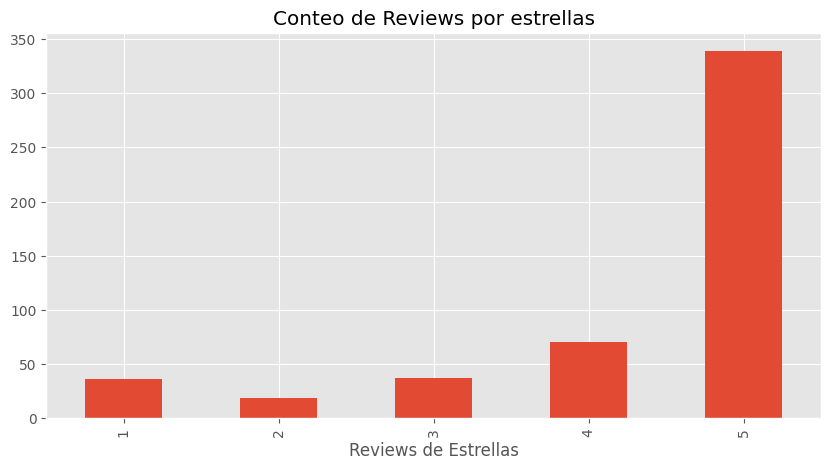

In [7]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Conteo de Reviews por estrellas',
                                             figsize=(10,5))
ax.set_xlabel('Reviews de Estrellas')
plt.show()

# Basico NLTK

In [8]:
example = df['Text'][2]
print(example)

This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.


In [9]:
tokens = nltk.word_tokenize(example) # Tokenizacion del ejemplo 2
tokens[:10]

['This', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few']

In [10]:
tagged = nltk.pos_tag(tokens) # Etiquetado de palabras con la abreviacion, link: https://www.h2kinfosys.com/blog/part-of-speech-tagging-chunking-with-nltk/#cntx
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('confection', 'NN'),
 ('that', 'WDT'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('around', 'IN'),
 ('a', 'DT'),
 ('few', 'JJ')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged) # Agrupamos las palabras en un solo grupo
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  confection/NN
  that/WDT
  has/VBZ
  been/VBN
  around/IN
  a/DT
  few/JJ
  centuries/NNS
  ./.
  It/PRP
  is/VBZ
  a/DT
  light/JJ
  ,/,
  pillowy/JJ
  citrus/NN
  gelatin/NN
  with/IN
  nuts/NNS
  -/:
  in/IN
  this/DT
  case/NN
  Filberts/NNP
  ./.
  And/CC
  it/PRP
  is/VBZ
  cut/VBN
  into/IN
  tiny/JJ
  squares/NNS
  and/CC
  then/RB
  liberally/RB
  coated/VBN
  with/IN
  powdered/JJ
  sugar/NN
  ./.
  And/CC
  it/PRP
  is/VBZ
  a/DT
  tiny/JJ
  mouthful/NN
  of/IN
  heaven/NN
  ./.
  Not/RB
  too/RB
  chewy/JJ
  ,/,
  and/CC
  very/RB
  flavorful/JJ
  ./.
  I/PRP
  highly/RB
  recommend/VBP
  this/DT
  yummy/JJ
  treat/NN
  ./.
  If/IN
  you/PRP
  are/VBP
  familiar/JJ
  with/IN
  the/DT
  story/NN
  of/IN
  C.S/NNP
  ./.
  (PERSON Lewis/NNP)
  '/POS
  ``/``
  The/DT
  (ORGANIZATION Lion/NNP)
  ,/,
  The/DT
  (GPE Witch/NNP)
  ,/,
  and/CC
  The/DT
  (ORGANIZATION Wardrobe/NNP)
  ''/''
  -/:
  this/DT
  is/VBZ
  the/DT
  treat/NN
  that/WDT
  sedu

# Paso 2. VADER Puntuacion de palabras
Vamos a usar NTKL's SentimentIntensityAnalyzer para obtener un puntaje del texto en neg/neu/pos
- Esto usa "Bag of Words":
  1. Remueve las palabras que conectan como a, y, en, etc.
  2. Cada plabra tiene una puntuacion y combina el total de puntaje

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # Es para poder ver el Score del proceso

sia = SentimentIntensityAnalyzer() # Modelo en una variable

In [13]:
sia

In [14]:
sia.polarity_scores("I'm so happy!!") # Probando el modelo

{'neg': 0.0, 'neu': 0.304, 'pos': 0.696, 'compound': 0.6785}

In [15]:
sia.polarity_scores("I'am angry")

{'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'compound': -0.5106}

In [16]:
sia.polarity_scores(example) # Probando el modelo con el ejemplo visto

{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}

### Vamos a correr la funcion Polarity Score en todas las reseñas del dataset

In [17]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)): # Usamos un for con i y filas, en todo el df mas especificas en text
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text) # La respuesta de cada id sera el texto

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(res).T # Creacion del df
vaders = vaders.reset_index().rename(columns={'index': 'Id'}) # Modificando el df
vaders = vaders.merge(df, how='left') # Poniendo el resultado en la izquerda

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Grafica de Resultado de VADER

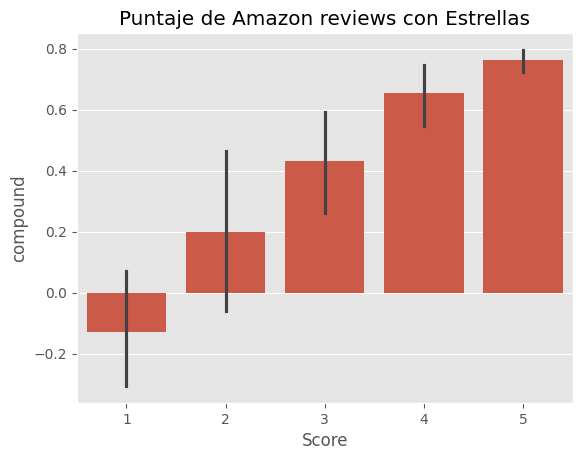

In [19]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Puntaje de Amazon reviews con Estrellas')
plt.show()

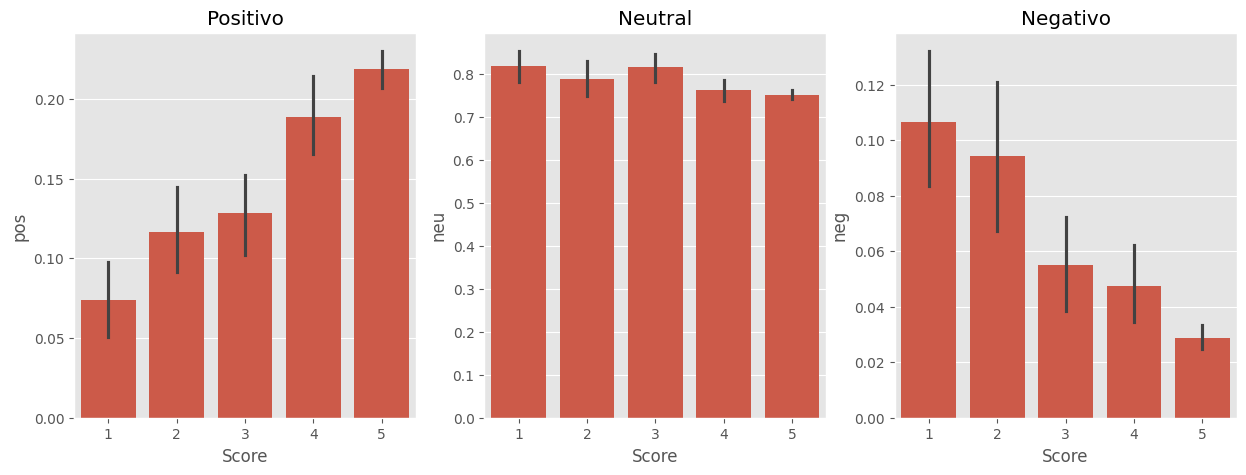

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positivo')
axs[1].set_title('Neutral')
axs[2].set_title('Negativo')
plt.show()

# Paso 3. Roberta Modelo Pre-Entrenado
- Usamos un modelo pre-entrenado
- El modelo usa una arquitectura Transformer y cuenta las palabras pero tambien relacionadas al contexto de otras palabras

In [21]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
# Documentacion del modelo en https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [23]:
# VADER Resultado del ejemplo
print(example)
sia.polarity_scores(example)

This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.


{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}

In [24]:
# Correr modelo Roberta
encoded_text = tokenizer(example, return_tensors='pt') # convertimos el texto en un formato que el modelo entiennde, numeroco y dividimos el texto en tokens que es divir el texto en unidad pequeÑas
output = model(**encoded_text) # Texto del ejemplo ya tekenizado
scores = output[0][0].detach().numpy()
scores = softmax(scores) # Porcentajes
scores_dict = { # Diccionario con puntuaciones
    'Roberta_neg': scores[0],
    'Roberta_neu': scores[1],
    'Roberta_pos': scores[2]
}
print(scores_dict)

{'Roberta_neg': 0.0032289, 'Roberta_neu': 0.09806742, 'Roberta_pos': 0.8987037}


In [25]:
# Creamos una funcion para no solo poder hacer el proceso de calcular el sentimiento en un ejemplo, si no que ahora en todo el dataframe
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {

      'Roberta_neg': scores[0],
      'Roberta_neu': scores[1],
      'Roberta_pos': scores[2]
  }
  return scores_dict

In [26]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
      roberta_result = polarity_scores_roberta(text)
      both = {**vader_result_rename, **roberta_result} # Combinación de Resultados
      res[myid] = both
  except RuntimeError:
    print(f"Se rompio por if{myid}")

  0%|          | 0/500 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Se rompio por if83
Se rompio por if187


In [27]:
result_df = pd.DataFrame(res).T # Creamos un dataframe con los nuevos resultados
result_df = result_df.reset_index().rename(columns={'index': 'Id'})
result_df = result_df.merge(df, how='left')

result_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,Roberta_neg,Roberta_neu,Roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Comparar modelos

In [28]:
result_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'Roberta_neg', 'Roberta_neu', 'Roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

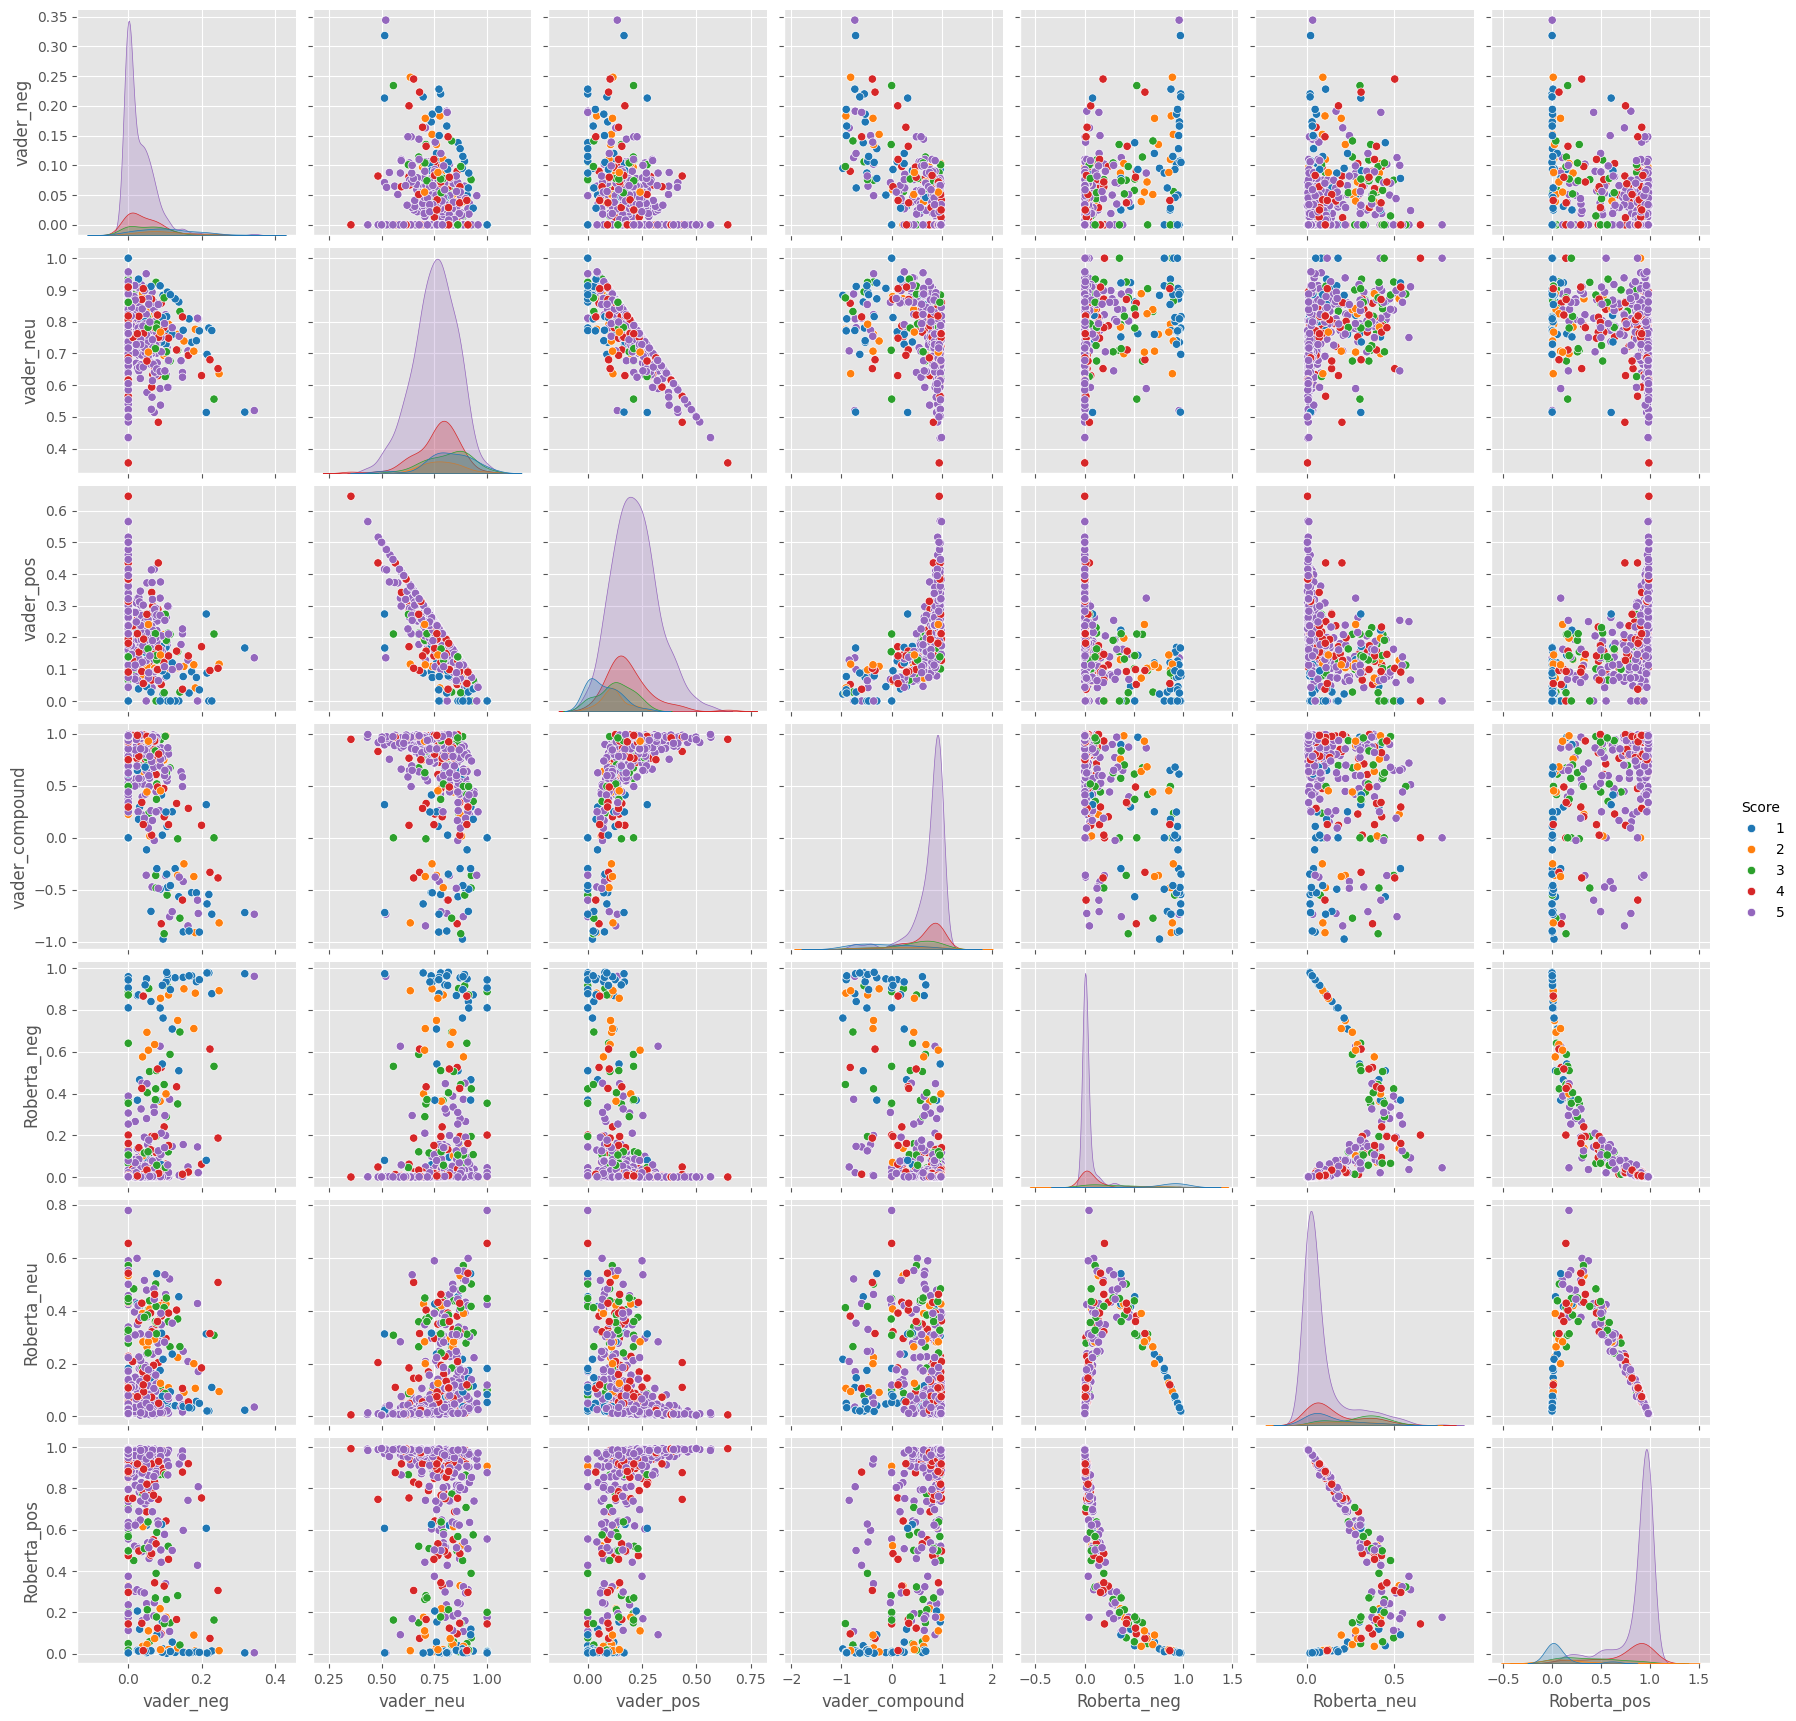

In [29]:
sns.pairplot(data=result_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'Roberta_neg', 'Roberta_neu', 'Roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

# Paso 4. Ver los ejemplos de cada modelo

In [32]:
result_df.query('Score == 1').sort_values('Roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [33]:
result_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [34]:
# Sentimiento Negativo de 5 estrellas
result_df.query('Score == 5').sort_values('Roberta_neg', ascending=False)['Text'].values[0]

'I so wish I would have read this review before purchasing TWO gallons of this oil for my health issues. It reeks like a chemical rubber smell. This smell is coming from the black rubber gasket in the lid. When I called to report the situation to the company, Sabrina told me I would have to pay to send them a sample to have tested by a lab. Unbelievable. Good customer service would indicate that they would pay for the product to be returned and give me a full refund, including shipping. The product is faulty. Period. I will never order anything from this company again and do not recommend it to anyone based on this horrible customer service and lack of responsibility and ownership.'

In [35]:
# Sentimiento Negativo de 5 estrellas
result_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Conclusion sobre estos resultados
Filtramos las reseñas con puntuaciones de 1 o hasta 5 estrellas
ordenamos de menor a mayor y seleccionamos el score negativo mas alto.
Y se noto que:
- Calificación estrellada no siempre refleja sentimiento
- No representa sentimiento global


Paso 5. Pipeline con Transfomers

In [37]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [42]:
sent_pipeline("I learn a make sentiment analysis with python and Hugginge Face, i'am so happy!!!")

[{'label': 'POSITIVE', 'score': 0.9997952580451965}]

In [43]:
sent_pipeline("go to hell and replace the water tank they took.")

[{'label': 'NEGATIVE', 'score': 0.9994757771492004}]

In [44]:
sent_pipeline("No mames Ricardo I will never invite you to my house again. What's this \
bitch shit about making soup in the toilet bowl and putting a dress on my dog Enrique?\
Neta go fuck yourself and you're going to replace the tinaco they took.")

[{'label': 'NEGATIVE', 'score': 0.9983617663383484}]

In [45]:
sent_pipeline("This is a confection that has been around a few centuries.  \
It is a light, pillowy citrus gelatin with nuts - in this case Filberts. \
And it is cut into tiny squares and then liberally coated with powdered sugar. \
 And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  \
 I highly recommend this yummy treat.  If you are familiar with the story of C.S. \
 Lewis The Lion, The Witch, and The Wardrobe - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch")

[{'label': 'POSITIVE', 'score': 0.999760091304779}]